<a href="https://colab.research.google.com/github/uzairazmat/Preprocessing/blob/main/Treating_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Handling NA values

you have to option

## 1. Delete all the observation that have missing value
## 2. chage Naan with mean or average value

In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, None, 8]})
print(df,"\n")

# Drop rows with any NA values
df_dropped = df.dropna()
print(df_dropped)


     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  NaN
3  4.0  8.0 

     A    B
0  1.0  5.0
3  4.0  8.0


In [ ]:
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, None, 8]})
print(df,"\n")
df.fillna(df.mean())

     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  NaN
3  4.0  8.0 



,A,B
0,1.000000,5.0
1,2.000000,6.5
2,2.333333,6.5
3,4.000000,8.0


## Outlier Treatment

    outliars that change the result of our model
    always outliars not dangarous so you have some measure when
    you remove outliars and when not
    outliears has bad effect on these models in most cases

    Linear regression , logistic regression , Adaboust and deep learning
    

#How to treat with Outliars
#In Most cases
1. Trimming (data become thin  and fast)
2. capping ( fix the limit min and max)

#In less cases
1. Assuming outliars as Missing value
2. Discretization(makes packets like 90-100 )

# How to detect outliars
1.Normal Distribution

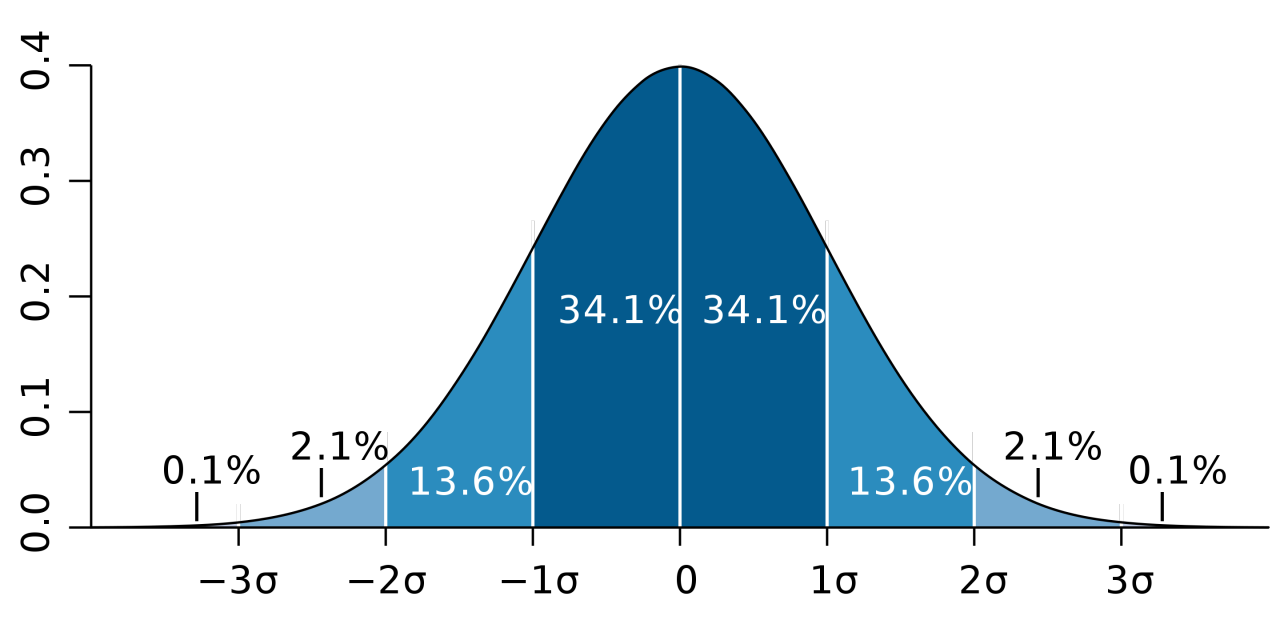


## so you can assume (μ+3σ< and μ-3σ>) as an outliar  (zero technique used in this situation)

#2.skewed distribution(Inter Quartile Range)(technique used in such situation Iqr based filtering)
#3.other distribution (use percentile methood)(technique used in such situation percentile)
# last technique is winsarization

#Outliar Removal using Z Score technique
#Understanding Z-Score
##Z-score is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution.
# Normal Distribution

1. Step1 you have to ensure data is normally distributed
2. calculate mean + 3 standard deviation or mean - 3 standard daviation
3. apply one from 2 technique trimming or capping


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file = "placement.csv"
data = pd.read_csv(file)

In [ ]:
data.shape

(1000, 3)

In [ ]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
data.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
data.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


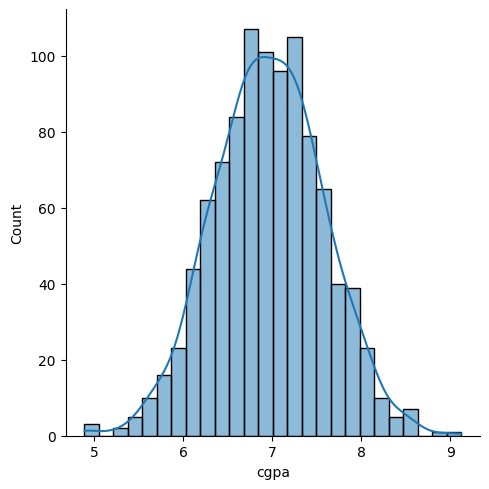

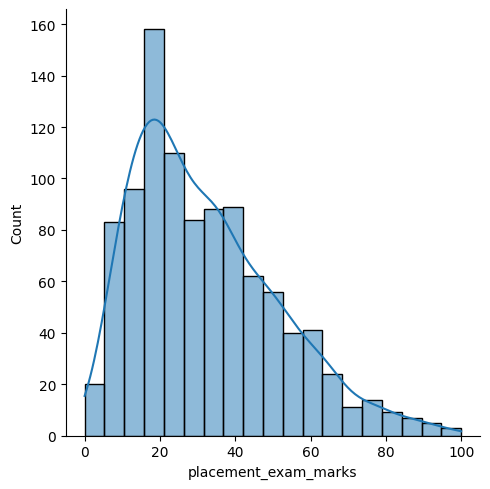

In [ ]:
plt.Figure(figsize=(16,10))
sns.displot(data["cgpa"],kde=True)
print("")

sns.displot(data["placement_exam_marks"],kde = True)

plt.show()

## So you can see cgpa is in normal distribution while placement_exam_marks not

## that's why we work on only cgpa

In [ ]:
print("Mean value",data["cgpa"].mean())
print("Min value", data["cgpa"].min())
print("Max Value",data["cgpa"].max())
print("std " ,data["cgpa"].std())

Mean value 6.96124
Min value 4.89
Max Value 9.12
std  0.6158978751323896


#Finding Boundreis Values


In [ ]:
highest_allowd = data["cgpa"].mean() + 3*(data["cgpa"].std())
lowest_allowed = data["cgpa"].mean() - 3*(data["cgpa"].std())
print(highest_allowd)
print(lowest_allowed)

8.808933625397168
5.113546374602832


In [ ]:
data[(data["cgpa"] > 8.8)|(data["cgpa"]< 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#Trimming Cgpa


In [ ]:
trimed_data = data[(data["cgpa"] < 8.8)&(data["cgpa"]> 5.11)]

In [ ]:
trimed_data.shape

(995, 3)

# Capping

In [ ]:
data["cgpa"] = np.where(
    data["cgpa"] >  highest_allowd,  #if cgpa higher than the value that gieher allowed than replace it with higher value
    highest_allowd,
    np.where(
        data["cgpa"] < lowest_allowed ,
        lowest_allowed,
        data["cgpa"]
    )

)

In [ ]:
data.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


#Skewed Distribution

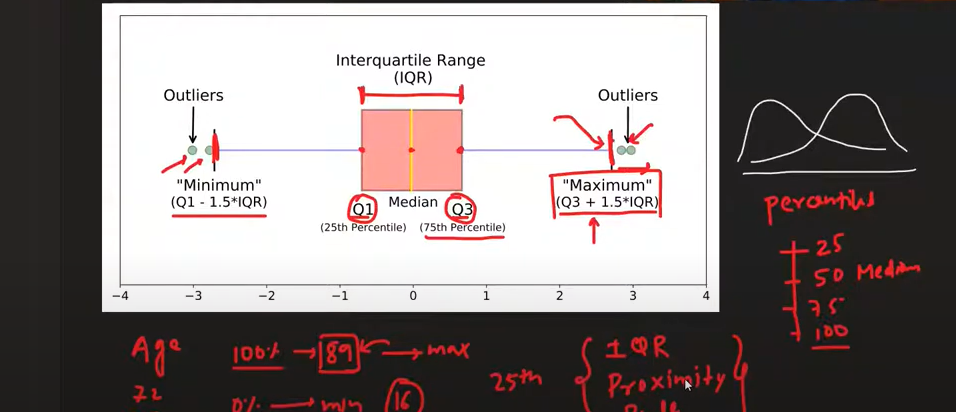

In [ ]:
data["placement_exam_marks"]

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64

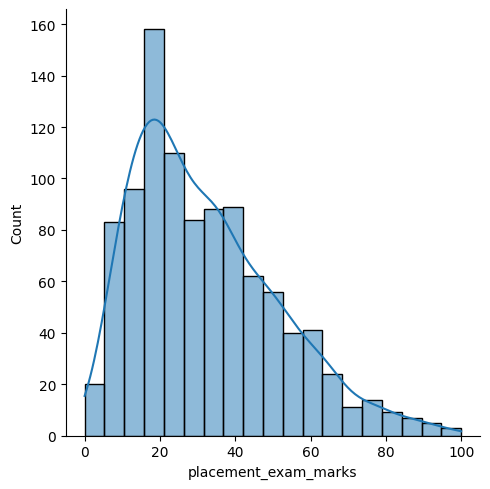

In [ ]:
plt.Figure(figsize=(16,10))

sns.displot(data["placement_exam_marks"],kde = True)

plt.show()

In [ ]:
data["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

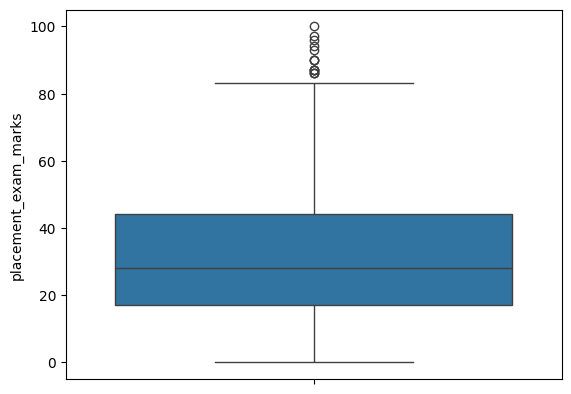

In [ ]:
sns.boxplot(data["placement_exam_marks"])

# Finding IQR

In [ ]:
percentile_25 =  data["placement_exam_marks"].quantile(0.25) #store .25 quantile value
percentile_75 =  data["placement_exam_marks"].quantile(0.75) #store .75 quantile value

In [ ]:
print("percentile_25",percentile_25)
print("percentile_75",percentile_75)

percentile_25 17.0
percentile_75 44.0


#Finding IQR

In [ ]:
#finding IQR

iqr = percentile_75 - percentile_25
iqr

27.0

#Finding Upper and Lower Limit

In [ ]:
upper_limit = percentile_75 + 1.5*(iqr)
lower_limit = percentile_25 - 1.5*(iqr)


In [ ]:
print("Upper Limit",upper_limit)
print("Lower Limit",lower_limit) # we not need lower limit in this case because we have data skewed at right side

Upper Limit 84.5
Lower Limit -23.5


# Finding ouliers in Skewed data  

In [ ]:
outlairs_of_marks = data[data["placement_exam_marks"]>upper_limit]

In [ ]:
outlairs_of_marks

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [ ]:
outlairs_of_marks.shape

(15, 3)

# TRIM METHOOD ON SKEWED DATA

In [ ]:
trimed_marks_data =  data[data["placement_exam_marks"]<upper_limit]

In [ ]:
trimed_marks_data

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


<Axes: ylabel='placement_exam_marks'>

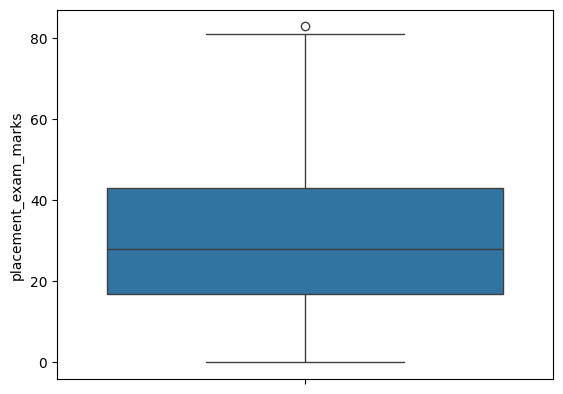

In [ ]:
sns.boxplot(trimed_marks_data["placement_exam_marks"])

# CAPPING ON SKEWED DATA

In [ ]:
capped_marks_data = data.copy()
capped_marks_data["placement_exam_marks"] = np.where(
    data["placement_exam_marks"]>upper_limit ,
    upper_limit,
    np.where(
        data["placement_exam_marks"]<lower_limit,
        lower_limit,
        capped_marks_data['placement_exam_marks']


    )

)

In [ ]:
capped_marks_data.shape

(1000, 3)

In [ ]:
data["placement_exam_marks"].describe()


count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [ ]:
capped_marks_data["placement_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64